# 使用寶可夢作為實驗資料素材

In [3]:
import numpy as np

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./pokemon.csv")


In [13]:
df

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN
5,Pidgey6,Pidgey,129,35,2.07,0.35,800,1,Quick Attack,Normal,...,1.27,800,1,Wing Attack,Flying,9,Aerial Ace,Flying,30,NaN
6,Pidgey7,Pidgey,10,10,0.92,0.25,200,1,Tackle,Normal,...,0.90,200,1,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
7,Pidgey8,Pidgey,25,14,2.72,0.37,200,1,Tackle,Normal,...,1.35,200,1,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
8,Pidgey9,Pidgey,24,13,2.07,0.32,200,1,Quick Attack,Normal,...,1.16,200,1,Wing Attack,Flying,9,Twister,Dragon,25,NaN
9,Pidgey10,Pidgey,161,35,1.45,0.31,1000,1,Tackle,Normal,...,1.14,1000,1,Steel Wing,Steel,15,Aerial Ace,Flying,30,NaN


In [14]:
alldata = df[ (df['attack_strong_type'] == 'Normal') |(df['attack_strong_type'] == 'Flying')  ]
# alldata = alldata[df['attack_strong_type'] == 'Flying']

In [15]:
f1 = alldata['height'].tolist()
f2 = alldata['weight'].tolist()
y = alldata['attack_strong_type']=='Normal'
y = [ 1 if i  else 0  for i in y.tolist()]


f1 = np.array(f1)
f2 = np.array(f2)

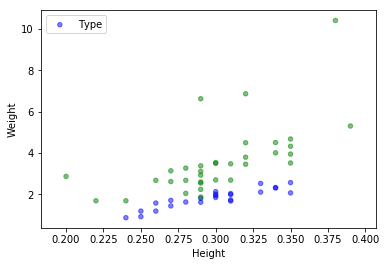

In [16]:
c = [ 'g' if i==1 else 'b' for i in y ]

plt.scatter(f1, f2, 20, c=c, alpha=0.5,
            label="Type")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2)
plt.show()

## 對原始資料進行 Sacle to 0~1 之間，避免 weight 太劇烈變動，導至 learning rate 難以設定

In [17]:
from sklearn.preprocessing import scale,MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

f1 = f2.reshape([f1.shape[0],1])
f2 = f2.reshape([f2.shape[0],1])



scaler1.fit(f1)
scaler2.fit(f2)

f1 = scaler1.transform(f1)
f2 = scaler2.transform(f2)

In [18]:
f1 = f1.reshape(f1.shape[0])
f2 = f2.reshape(f2.shape[0])

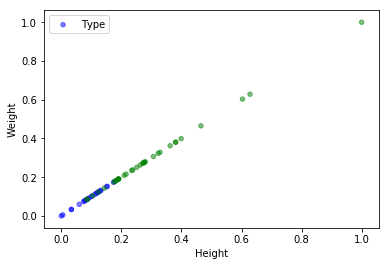

In [19]:
c = [ 'g' if i==1 else 'b' for i in y ]

plt.scatter(f1, f2, 20, c=c, alpha=0.5,
            label="Type")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2)
plt.show()


In [11]:
Y = np.array([1,1,0,0,1])
A = np.array([0.8, 0.7, 0.2, 0.1, 0.9])
A2 = np.array([0.6, 0.6, 0.2, 0.1, 0.3])

def cross_entropy(Y,A):
    
    # small tip 因 log(0)　會趨近負無限大，會產生 nan ，故這裡統一加上 0.00001
    Y = np.array(Y)
    A = np.array(A)
    m = len(A)
    cost = -(1.0/m) * np.sum(Y*np.log(A+0.00001) + (1-Y)*np.log(1-A+0.00001))
    return cost
# Test cross_entropy Function
print cross_entropy(Y,A)
print cross_entropy(Y,A2)
print cross_entropy(Y,Y)

0.202724314066
0.510807568405
-9.9999500004e-06


## LogisticRegression 公式推導如下

推導過程請參考 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Logistic%20Regression%20(v4).pdf
中的 3~13 頁，其重點步驟如下

* 令 $y=sigmoid(w*x+b)=f_{w,b}$
* 我們想要 Maxima右邊這個式之 => $ ArgMaxL_{w,b}= \prod\left( \hat y*f_{w,b} + (1-\hat y)*(1-f_{w,b}) \right) $
* 但如果我們要看成 Lose Function 反過加上個負號並取 Log 方便計算，所以式之會變成如下
* $ ArgMinL_{w,b}= -1*ln\sum\left( \hat y*f_{w,b} + (1-\hat y)*(1-f_{w,b}) \right) $
* 然後對述的式子，分別對 $w,b$ 作偏微分，以更取得到 $\Delta w$及$\Delta b$
* 然後再乘上 Learning Rate 進行更新如式 $w_{t+1}=w_t - r*\Delta w  $ , $b_{t+1}=b_t - r*\Delta b  $
 

### 最終推導結果如下

* $w_i$ 的 update 公式如下 , $\hat y$ 為 traning data 的 target label， $x^n$ 為第 n 個 data 的值
* $w_{t+1} = w_t - r*\sum\left((\hat y^n - f_{w,b}(x^n))*x^n*-1\right) $
* $b_i$ 的 update 與 $w_i$ 只差了一項就是不用乘上 $X^n$ ，如右 $b_{t+1} = b_t - r*\sum\left(-1*(\hat y^n - f_{w,b}(x^n))\right) $

In [10]:
import math

w1 =1
w2 =1
b = 0
r = 0.001
def fx(x1,x2):
    temp = w1*x1 + w2*x2 + b
    y_head = 1. / (1. + math.exp(-1.*temp))
    return y_head



In [90]:
for i in range(1000000):
    w1_delta=0
    w2_delta=0

    b_delta = 0

    y_error = 0 
    
    
    for x1,x2,y_now in zip(f1,f2,y):
        
        y_error = y_now - fx(x1,x2)
        

        w1_delta = -1*x1*y_error
        w2_delta = -1*x2*y_error

        b_delta = -1*y_error

        w1 -= r*w1_delta
        w2 -= r*w2_delta

        b -= r*b_delta



    
    if i % 10000==0 : 
        error_rate = 0
        y_predict = []
        
        for x1,x2,y_now in zip(f1,f2,y):            
            y_predict.append(fx(x1,x2))
            if y_now==1 and fx(x1,x2) < 0.5:
                error_rate+=1
            elif y_now==0 and fx(x1,x2) >=0.5:
                error_rate+=1

        print("{}, {}, {},{},{}".format(error_rate*1./len(y) ,cross_entropy(y,y_predict),w1,w2,b)  )


0.396551724138, 0.598263727648, 1.00186819711,1.00186819711,-0.000687628920726
0.155172413793, 0.354499399941, 8.38653408468,8.38653408468,-2.47999122854
0.155172413793, 0.327182466545, 11.0965805172,11.0965805172,-3.29071112764
0.155172413793, 0.317912473949, 12.6899076133,12.6899076133,-3.75804187447
0.155172413793, 0.313802383861, 13.7543008758,13.7543008758,-4.06756911698
0.155172413793, 0.311734453276, 14.5105670869,14.5105670869,-4.28646260923
0.155172413793, 0.310615185886, 15.0675608959,15.0675608959,-4.44721220441
0.155172413793, 0.30998038169, 15.4873915942,15.4873915942,-4.5681431058
0.155172413793, 0.309608687221, 15.8088904274,15.8088904274,-4.66062542693
0.155172413793, 0.309386072823, 16.0578876316,16.0578876316,-4.73218242562
0.155172413793, 0.309250529573, 16.2523406895,16.2523406895,-4.78802432539
0.155172413793, 0.309166986782, 16.4051458503,16.4051458503,-4.83188223591
0.155172413793, 0.309115021859, 16.5257936153,16.5257936153,-4.86649602221
0.155172413793, 0.30908